In [1]:
%%javascript
require(["codemirror/keymap/sublime", "notebook/js/cell", "base/js/namespace"],
    function(sublime_keymap, cell, IPython){
        cell.Cell.options_default.cm_config.keyMap = 'sublime';
        var cells = IPython.notebook.get_cells();
        for(var cl=0; cl< cells.length ; cl++){
            cells[cl].code_mirror.setOption('keyMap', 'sublime');
        }
    }
);

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load lite results from log file

In [3]:
import ast

test_log = pd.read_excel('results/df/test_log.xlsx').drop(['Unnamed: 0'],axis=1)
test_log['n_features'] = [len(ast.literal_eval(item)) for item in test_log['features']]
test_log.round(3).tail()

,auto_train,added_features,oversample,features,train_size,stratified,robustness_iterations,results_df,accuracy,recall,selectivity,precision,NPV,FNR,F1_measure,n_features
589,True,1,True,"['serum_creatinine', 'sex']",0.66,False,100,df589,0.678,0.395,0.811,0.501,0.742,0.605,0.435,2
590,True,1,True,"['serum_creatinine', 'smoking']",0.66,False,100,df590,0.729,0.466,0.853,0.614,0.773,0.534,0.520,2
591,True,1,True,"['serum_sodium', 'sex']",0.66,False,100,df591,0.573,0.544,0.588,0.385,0.734,0.456,0.445,2
592,True,1,True,"['serum_sodium', 'smoking']",0.66,False,100,df592,0.566,0.564,0.571,0.386,0.735,0.436,0.451,2
593,True,1,True,"['sex', 'smoking']",0.66,False,100,df593,0.460,0.620,0.392,0.317,0.695,0.380,0.408,2


#### Ever-changing part

In [5]:
query = {
    'auto_train': True,
    'oversample': True,
    'stratified': True,
    'features': "['ejection_fraction', 'serum_creatinine']"
}
query_str = ''
for key in query.keys():
    query_str = query_str + f'{key} == @query["{key}"] & ' 
query_str = query_str[:-2]

test_log_sorted = test_log.query(query_str).sort_values(by=['added_features'],ascending=True).round(3)
test_log_sorted

,auto_train,added_features,oversample,features,train_size,stratified,robustness_iterations,results_df,accuracy,recall,selectivity,precision,NPV,FNR,F1_measure,n_features
319,True,1,True,"['ejection_fraction', 'serum_creatinine']",0.66,True,100,df319,0.719,0.660,0.748,0.555,0.824,0.340,0.599,2
534,True,2,True,"['ejection_fraction', 'serum_creatinine']",0.66,True,100,df534,0.719,0.660,0.747,0.554,0.825,0.340,0.599,2
535,True,4,True,"['ejection_fraction', 'serum_creatinine']",0.66,True,100,df535,0.722,0.653,0.755,0.561,0.823,0.347,0.601,2
536,True,8,True,"['ejection_fraction', 'serum_creatinine']",0.66,True,100,df536,0.717,0.658,0.745,0.551,0.824,0.342,0.596,2
537,True,16,True,"['ejection_fraction', 'serum_creatinine']",0.66,True,100,df537,0.714,0.645,0.746,0.548,0.818,0.355,0.589,2
538,True,32,True,"['ejection_fraction', 'serum_creatinine']",0.66,True,100,df538,0.722,0.654,0.754,0.558,0.825,0.346,0.598,2


<AxesSubplot:xlabel='added_features', ylabel='recall'>

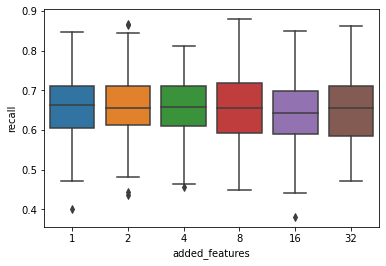

In [6]:
fig,ax = plt.subplots()

df_plot = pd.DataFrame()

for added_features,df in test_log_sorted.groupby('added_features'):
    df_path = f'results/df/{df.results_df.values[0]}.pkl'
    df_plot[str(added_features)] = pd.read_pickle(df_path)['recall']

sns.boxplot(x="added_features", y="recall",
            data=pd.melt(df_plot).rename(columns={'variable': 'added_features', 'value': 'recall'}))